In [1]:
# Import necessary libarary

import pandas as pd 
import numpy  as np

import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Upload necessary libararies for ML

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Display for all row and column 

pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [4]:
# Upload Files

temp_detail = pd.read_csv('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_3/India_CL/Complex_Data/Comp_Delphi.csv')
gdp = pd.read_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_3/India_CL/Complex_Data/New_Delhi_GDP.xlsx')
weather_quality = pd.read_csv('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_3/India_CL/Complex_Data/New_Delhi_Weather_Quality.csv')
labor_pro_1 = pd.read_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_3/India_CL/Complex_Data/Indian_Labor_Productivity.xlsx')
labor_pro_2 = pd.read_excel('/Users/ilyasozgur/Desktop/Thesis/Models/Model_for_Thesis/Model_3/India_CL/Complex_Data/Labor_Productivity_GDP.xlsx')

## Feature 1 - Mean Temperature

In [5]:
# Select necessary columns
mean_temp = temp_detail.copy()
mean_temp = mean_temp[['date_time','tempC','FeelsLikeC','uvIndex','WindChillC','humidity','precipMM']]

In [6]:
# Prepare the data frame for calculation
mean_temp[['Year','Month','Rest']] = mean_temp['date_time'].str.split('-',n=3,expand=True)
mean_temp = mean_temp[['Rest','Month','Year','tempC','FeelsLikeC','uvIndex','WindChillC','humidity','precipMM']]
mean_temp[['Day','Hour']] = mean_temp['Rest'].str.split(' ',n=1,expand=True)
mean_temp = mean_temp[['Hour','Day','Month','Year','tempC','FeelsLikeC','uvIndex','WindChillC','humidity','precipMM']]

In [7]:
# Calculate annual mean temperature
mean_temp_daily = mean_temp[['Year','tempC']]
mean_temp_daily = mean_temp_daily.groupby(['Year'])['tempC'].mean().reset_index()

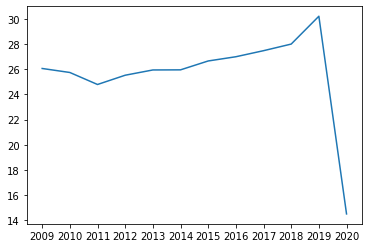

In [8]:
plt.plot(mean_temp_daily['Year'], mean_temp_daily['tempC']) 

Obviously 2019 is not completed data, therefore better to ffill for the 2019

In [9]:
# Drop 2020 and forward fill with 2019

if mean_temp_daily['tempC'][len(mean_temp_daily['tempC'])-1] < mean_temp_daily['tempC'][len(mean_temp_daily['tempC'])-2]:
    mean_temp_daily['tempC'][len(mean_temp_daily['tempC'])-1] = mean_temp_daily['tempC'][len(mean_temp_daily['tempC'])-2]

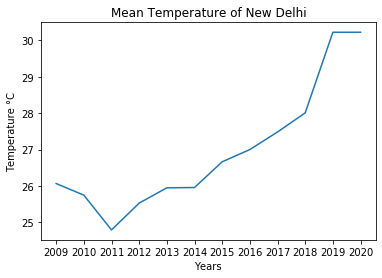

In [10]:
plt.title('Mean Temperature of New Delhi')

plt.plot(mean_temp_daily['Year'], mean_temp_daily['tempC']) 

plt.xlabel('Years')
plt.ylabel('Temperature °C')

#plt.legend(loc="upper left")
plt.show()

In [11]:
mean_temp_daily.rename({'tempC':'Mean_Temp'}, axis=1, inplace=True)

In [12]:
mean_temp_daily = mean_temp_daily.reset_index(drop=True)

## Feature 2 - Summer Mean Temp.

In [13]:
# Prepare dataframe frame for calculation
summer_mean_temp = mean_temp.groupby(['Day','Month','Year'])['tempC'].mean().reset_index()
summer_mean_temp = summer_mean_temp.sort_values(['Year','Month','Day'],ascending=[True,True,True])
summer_mean_temp.reset_index(inplace=True)
summer_mean_temp.drop(columns=['index'],inplace=True)

In [14]:
# Change the data types

summer_mean_temp['Day'] = summer_mean_temp['Day'].astype(int)
summer_mean_temp['Month'] = summer_mean_temp['Month'].astype(int)
summer_mean_temp['Year'] = summer_mean_temp['Year'].astype(str)

In [15]:
# Chose necessary months
summer_mean_temp =  summer_mean_temp[(summer_mean_temp['Month'] == 6) |
                                     (summer_mean_temp['Month'] == 7) |
                                     (summer_mean_temp['Month'] == 8) ]

In [16]:
# Calculate Summer Temperature Average

summer_mean_temp = summer_mean_temp.groupby(['Year'])['tempC'].mean().reset_index()
summer_mean_temp.reset_index(inplace=True)
summer_mean_temp.drop(columns=['index'],inplace=True)

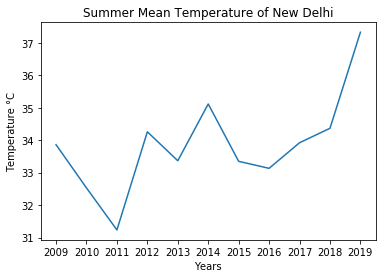

In [17]:
plt.title('Summer Mean Temperature of New Delhi')

plt.plot(summer_mean_temp['Year'], summer_mean_temp['tempC']) 

plt.xlabel('Years')
plt.ylabel('Temperature °C')

#plt.legend(loc="upper left")
plt.show()

In [18]:
# Drop 2020 and forward fill with 2019

if summer_mean_temp['tempC'][len(summer_mean_temp['tempC'])-1] < summer_mean_temp['tempC'][len(summer_mean_temp['tempC'])-2]:
    summer_mean_temp['tempC'][len(summer_mean_temp['tempC'])-1] = summer_mean_temp['tempC'][len(summer_mean_temp['tempC'])-2]

In [19]:
summer_mean_temp.rename({'tempC':'Summer_Mean_Temp'}, axis=1, inplace=True)

In [20]:
# Create new rows

summer_mean_temp_after = {'Year':[2020],'Summer_Mean_Temp':[np.nan]}
summer_mean_temp_after = pd.DataFrame(summer_mean_temp_after)

In [21]:
# Fill to backwards

summer_mean_temp = pd.concat([summer_mean_temp,summer_mean_temp_after])
summer_mean_temp = summer_mean_temp.ffill(axis ='rows')

In [22]:
summer_mean_temp = summer_mean_temp.reset_index(drop=True)
summer_mean_temp['Year'] = summer_mean_temp['Year'].astype(str)

## Feature 3 - Extremely Hot Days

In [23]:
# Prepare data Set
ext_hot_days = mean_temp.groupby(['Day','Month','Year'])['tempC'].mean().reset_index()
ext_hot_days = ext_hot_days.sort_values(['Year','Month','Day'],ascending=[True,True,True])
ext_hot_days.reset_index(inplace=True)
ext_hot_days.drop(columns=['index'],inplace=True)

In [24]:
# If equal or higher then 28 degree call as extremely hot days
ext_hot_days['Number_of_Hot_Days'] = ext_hot_days['tempC'].apply(lambda x: 1 if x >= 30 else 0)
ext_hot_days = ext_hot_days[ext_hot_days['Number_of_Hot_Days'] == 1]
ext_hot_days = ext_hot_days.groupby(['Year'])['Number_of_Hot_Days'].count().reset_index()

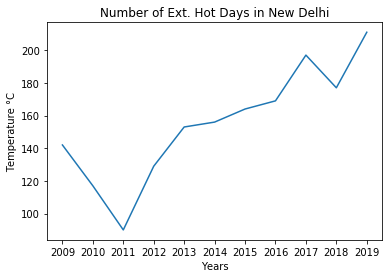

In [25]:
plt.title('Number of Ext. Hot Days in New Delhi')

plt.plot(ext_hot_days['Year'], ext_hot_days['Number_of_Hot_Days'])  

plt.xlabel('Years')
plt.ylabel('Temperature °C')

#plt.legend(loc="upper left")
plt.show()

In [26]:
# Drop 2020 and forward fill with 2019

if ext_hot_days['Number_of_Hot_Days'][len(ext_hot_days['Number_of_Hot_Days'])-1] < ext_hot_days['Number_of_Hot_Days'][len(ext_hot_days['Number_of_Hot_Days'])-2]:
    ext_hot_days['Number_of_Hot_Days'][len(ext_hot_days['Number_of_Hot_Days'])-1] = ext_hot_days['Number_of_Hot_Days'][len(ext_hot_days['Number_of_Hot_Days'])-2]

In [27]:
# Create new rows

ext_hot_days_after = {'Year':[2020],'Number_of_Hot_Days':[np.nan]}
ext_hot_days_after = pd.DataFrame(ext_hot_days_after)

In [28]:
# Fill to backwards

ext_hot_days = pd.concat([ext_hot_days,ext_hot_days_after])
ext_hot_days = ext_hot_days.ffill(axis ='rows')

In [29]:
ext_hot_days = ext_hot_days.reset_index(drop=True)
ext_hot_days['Year'] = ext_hot_days['Year'].astype(str)

# Feature 4 - Max Daily Temp

In [30]:
# Prepare data Set
max_daily_temp = mean_temp.groupby(['Day','Month','Year'])['tempC'].mean().reset_index()
max_daily_temp = max_daily_temp.sort_values(['Year','Month','Day'],ascending=[True,True,True])
max_daily_temp.reset_index(inplace=True)
max_daily_temp.drop(columns=['index'],inplace=True)

In [31]:
# Taken Max temp. for each year
max_daily_temp = max_daily_temp.groupby(['Year'])['tempC'].apply(lambda x: x.max()).reset_index()

In [32]:
if max_daily_temp['tempC'][len(max_daily_temp['tempC'])-1] < max_daily_temp['tempC'][len(max_daily_temp['tempC'])-2]:
    max_daily_temp['tempC'][len(max_daily_temp['tempC'])-1] = max_daily_temp['tempC'][len(max_daily_temp['tempC'])-2]

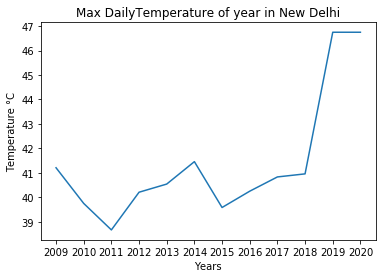

In [33]:
plt.title('Max DailyTemperature of year in New Delhi')

plt.plot(max_daily_temp['Year'], max_daily_temp['tempC']) 

plt.xlabel('Years')
plt.ylabel('Temperature °C')

#plt.legend(loc="upper left")
plt.show()

In [34]:
max_daily_temp.rename({'tempC':'Max_Daily_Temp'}, axis=1, inplace=True)

In [35]:
max_daily_temp = max_daily_temp.reset_index(drop=True)

# Feature 5 - Mean Feels Temperature

In [36]:
# Prepare data Set
mean_feel_temp = mean_temp.groupby(['Day','Month','Year'])['FeelsLikeC'].mean().reset_index()
mean_feel_temp = mean_feel_temp.sort_values(['Year','Month','Day'],ascending=[True,True,True])
mean_feel_temp.reset_index(inplace=True)
mean_feel_temp.drop(columns=['index'],inplace=True)

In [37]:
# Calculate annual mean feel temperature
mean_feel_temp = mean_feel_temp[['Year','FeelsLikeC']]
mean_feel_temp = mean_feel_temp.groupby(['Year'])['FeelsLikeC'].mean().reset_index()

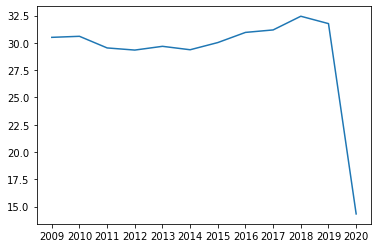

In [38]:
plt.plot(mean_feel_temp['Year'], mean_feel_temp['FeelsLikeC']) 

In [39]:
# Drop 2020 and forward fill with 2019

if mean_feel_temp['FeelsLikeC'][len(mean_feel_temp['FeelsLikeC'])-1] < mean_feel_temp['FeelsLikeC'][len(mean_feel_temp['FeelsLikeC'])-2]:
    mean_feel_temp['FeelsLikeC'][len(mean_feel_temp['FeelsLikeC'])-1] = mean_feel_temp['FeelsLikeC'][len(mean_feel_temp['FeelsLikeC'])-2]

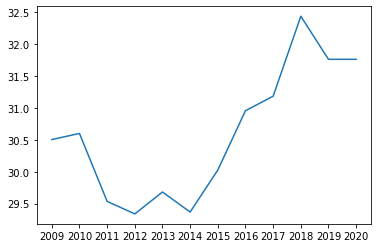

In [40]:
plt.plot(mean_feel_temp['Year'], mean_feel_temp['FeelsLikeC']) 

In [41]:
mean_feel_temp.rename({'FeelsLikeC':'Mean_Feels_Temp'}, axis=1, inplace=True)

In [42]:
mean_feel_temp = mean_feel_temp.reset_index(drop=True)

# Feature 6 - Summer Mean Feel Temp

In [43]:
# Prepare data Set
summer_mean_feel_temp = mean_temp.groupby(['Day','Month','Year'])['FeelsLikeC'].mean().reset_index()
summer_mean_feel_temp = summer_mean_feel_temp.sort_values(['Year','Month','Day'],ascending=[True,True,True])
summer_mean_feel_temp.reset_index(inplace=True)
summer_mean_feel_temp.drop(columns=['index'],inplace=True)

In [44]:
# Change the data types

summer_mean_feel_temp['Day']   = summer_mean_feel_temp['Day'].astype(int)
summer_mean_feel_temp['Month'] = summer_mean_feel_temp['Month'].astype(int)
summer_mean_feel_temp['Year']  = summer_mean_feel_temp['Year'].astype(str)

In [45]:
# Chose necessary months
summer_mean_feel_temp =  summer_mean_feel_temp[(summer_mean_feel_temp['Month'] == 6) |
                                               (summer_mean_feel_temp['Month'] == 7) |
                                               (summer_mean_feel_temp['Month'] == 8) ]

In [46]:
# Calculate Summer Temperature Average

summer_mean_feel_temp = summer_mean_feel_temp.groupby(['Year'])['FeelsLikeC'].mean().reset_index()
summer_mean_feel_temp.reset_index(inplace=True)
summer_mean_feel_temp.drop(columns=['index'],inplace=True)

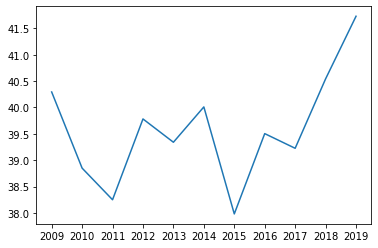

In [47]:
plt.plot(summer_mean_feel_temp['Year'], summer_mean_feel_temp['FeelsLikeC']) 

In [48]:
# Drop 2020 and forward fill with 2019

if summer_mean_feel_temp['FeelsLikeC'][len(summer_mean_feel_temp['FeelsLikeC'])-1] < summer_mean_feel_temp['FeelsLikeC'][len(summer_mean_feel_temp['FeelsLikeC'])-2]:
    summer_mean_feel_temp['FeelsLikeC'][len(summer_mean_feel_temp['FeelsLikeC'])-1] = summer_mean_feel_temp['FeelsLikeC'][len(summer_mean_feel_temp['FeelsLikeC'])-2]

In [49]:
summer_mean_feel_temp.rename({'FeelsLikeC':'Summer_Mean_Feels_Temp'}, axis=1, inplace=True)

In [50]:
# Create new rows

summer_mean_feel_temp_after = {'Year':[2020],'Summer_Mean_Feels_Temp':[np.nan]}
summer_mean_feel_temp_after = pd.DataFrame(summer_mean_feel_temp_after)

# Fill to backwards

summer_mean_feel_temp = pd.concat([summer_mean_feel_temp,summer_mean_feel_temp_after])
summer_mean_feel_temp = summer_mean_feel_temp.ffill(axis ='rows')

In [51]:
summer_mean_feel_temp = summer_mean_feel_temp.reset_index(drop=True)

In [52]:
summer_mean_feel_temp['Year']  = summer_mean_feel_temp['Year'].astype(str)

# Feature 7 - Mean uvIndex

In [53]:
# Prepare data Set
mean_uv = mean_temp.groupby(['Day','Month','Year'])['uvIndex'].mean().reset_index()
mean_uv = mean_uv.sort_values(['Year','Month','Day'],ascending=[True,True,True])
mean_uv.reset_index(inplace=True)
mean_uv.drop(columns=['index'],inplace=True)

In [54]:
# Calculate annual mean feel temperature
mean_uv = mean_uv[['Year','uvIndex']]
mean_uv = mean_uv.groupby(['Year'])['uvIndex'].mean().reset_index()

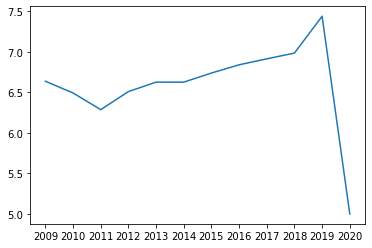

In [55]:
plt.plot(mean_uv['Year'], mean_uv['uvIndex']) 

In [56]:
# Drop 2020 and forward fill with 2019

if mean_uv['uvIndex'][len(mean_uv['uvIndex'])-1] < mean_uv['uvIndex'][len(mean_uv['uvIndex'])-2]:
    mean_uv['uvIndex'][len(mean_uv['uvIndex'])-1] = mean_uv['uvIndex'][len(mean_uv['uvIndex'])-2]

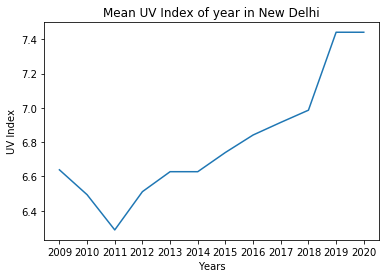

In [57]:
plt.title('Mean UV Index of year in New Delhi')

plt.plot(mean_uv['Year'], mean_uv['uvIndex']) 

plt.xlabel('Years')
plt.ylabel('UV Index')

#plt.legend(loc="upper left")
plt.show()

In [58]:
mean_uv = mean_uv.reset_index(drop=True)

# Feature 8 - Summer Mean uvIndex

In [59]:
# Prepare data Set
summer_mean_uv = mean_temp.groupby(['Day','Month','Year'])['uvIndex'].mean().reset_index()
summer_mean_uv = summer_mean_uv.sort_values(['Year','Month','Day'],ascending=[True,True,True])
summer_mean_uv.reset_index(inplace=True)
summer_mean_uv.drop(columns=['index'],inplace=True)

In [60]:
# Change the data types

summer_mean_uv['Day']   = summer_mean_uv['Day'].astype(int)
summer_mean_uv['Month'] = summer_mean_uv['Month'].astype(int)
summer_mean_uv['Year']  = summer_mean_uv['Year'].astype(int)

In [61]:
# Chose necessary months
summer_mean_uv =  summer_mean_uv[(summer_mean_uv['Month'] == 6) |
                                 (summer_mean_uv['Month'] == 7) |
                                 (summer_mean_uv['Month'] == 8) ]

In [62]:
# Calculate Summer Temperature Average

summer_mean_uv = summer_mean_uv.groupby(['Year'])['uvIndex'].mean().reset_index()
summer_mean_uv.reset_index(inplace=True)
summer_mean_uv.drop(columns=['index'],inplace=True)

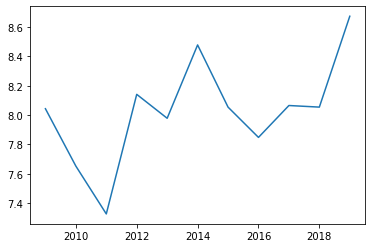

In [63]:
plt.plot(summer_mean_uv['Year'], summer_mean_uv['uvIndex']) 

In [64]:
# Drop 2020 and forward fill with 2019

if summer_mean_uv['uvIndex'][len(summer_mean_uv['uvIndex'])-1] < summer_mean_uv['uvIndex'][len(summer_mean_uv['uvIndex'])-2]:
    summer_mean_uv['uvIndex'][len(summer_mean_uv['uvIndex'])-1] = summer_mean_uv['uvIndex'][len(summer_mean_uv['uvIndex'])-2]

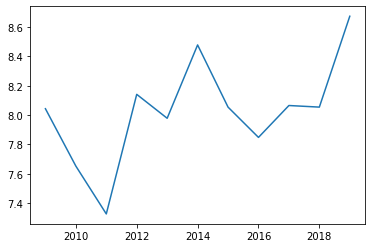

In [65]:
plt.plot(summer_mean_uv['Year'], summer_mean_uv['uvIndex']) 

In [66]:
# Create new rows

summer_mean_uv_after = {'Year':[2020],'uvIndex':[np.nan]}
summer_mean_uv_after = pd.DataFrame(summer_mean_uv_after)

# Fill to backwards

summer_mean_uv = pd.concat([summer_mean_uv,summer_mean_uv_after])
summer_mean_uv = summer_mean_uv.ffill(axis ='rows')

In [67]:
summer_mean_uv = summer_mean_uv.reset_index(drop=True)

In [68]:
summer_mean_uv.rename({'uvIndex':'Summer_uvIndex'}, axis=1, inplace=True)

# Feature 9 - Heat Waves Temperature

In [69]:
# Prepare data Set
heat_temp = mean_temp.groupby(['Day','Month','Year'])['WindChillC'].mean().reset_index()
heat_temp = heat_temp.sort_values(['Year','Month','Day'],ascending=[True,True,True])
heat_temp.reset_index(inplace=True)
heat_temp.drop(columns=['index'],inplace=True)

In [70]:
# Calculate annual mean feel temperature
heat_temp = heat_temp[['Year','WindChillC']]
heat_temp = heat_temp.groupby(['Year'])['WindChillC'].mean().reset_index()

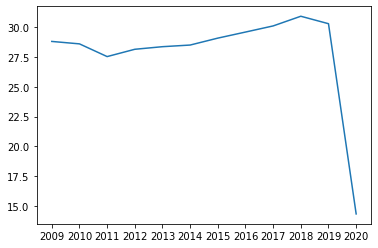

In [71]:
plt.plot(heat_temp['Year'], heat_temp['WindChillC']) 

In [72]:
# Drop 2020 and forward fill with 2019

if heat_temp['WindChillC'][len(heat_temp['WindChillC'])-1] < heat_temp['WindChillC'][len(heat_temp['WindChillC'])-2]:
    heat_temp['WindChillC'][len(heat_temp['WindChillC'])-1] = heat_temp['WindChillC'][len(heat_temp['WindChillC'])-2]

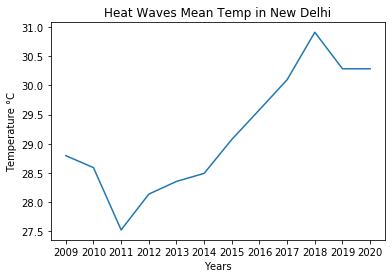

In [73]:
plt.title('Heat Waves Mean Temp in New Delhi')

plt.plot(heat_temp['Year'], heat_temp['WindChillC']) 

plt.xlabel('Years')
plt.ylabel('Temperature °C')

#plt.legend(loc="upper left")
plt.show()

In [74]:
heat_temp.rename({'WindChillC':'Mean_Heat_Waves_Temp'}, axis=1, inplace=True)

In [75]:
heat_temp = heat_temp.reset_index(drop=True)

# Feature 10 - Heat Waves Summer Temperature

In [76]:
# Prepare data Set
summer_wind_temp = mean_temp.groupby(['Day','Month','Year'])['WindChillC'].mean().reset_index()
summer_wind_temp = summer_wind_temp.sort_values(['Year','Month','Day'],ascending=[True,True,True])
summer_wind_temp.reset_index(inplace=True)
summer_wind_temp.drop(columns=['index'],inplace=True)

In [77]:
# Change the data types

summer_wind_temp['Day']   = summer_wind_temp['Day'].astype(int)
summer_wind_temp['Month'] = summer_wind_temp['Month'].astype(int)
summer_wind_temp['Year']  = summer_wind_temp['Year'].astype(int)

In [78]:
# Chose necessary months
summer_wind_temp =  summer_wind_temp[(summer_wind_temp['Month'] == 6) |
                                     (summer_wind_temp['Month'] == 7) |
                                     (summer_wind_temp['Month'] == 8) ]

In [79]:
# Calculate Summer Temperature Average

summer_wind_temp = summer_wind_temp.groupby(['Year'])['WindChillC'].mean().reset_index()
summer_wind_temp.reset_index(inplace=True)
summer_wind_temp.drop(columns=['index'],inplace=True)

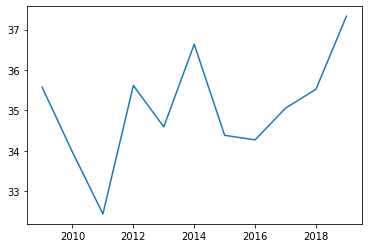

In [80]:
plt.plot(summer_wind_temp['Year'], summer_wind_temp['WindChillC']) 

In [81]:
# Drop 2020 and forward fill with 2019

if summer_wind_temp['WindChillC'][len(summer_wind_temp['WindChillC'])-1] < summer_wind_temp['WindChillC'][len(summer_wind_temp['WindChillC'])-2]:
    summer_wind_temp['WindChillC'][len(summer_wind_temp['WindChillC'])-1] = summer_wind_temp['WindChillC'][len(summer_wind_temp['WindChillC'])-2]

In [82]:
summer_wind_temp.rename({'WindChillC':'Summer_Mean_Heat_Waves_Temp'}, axis=1, inplace=True)

In [83]:
# Create new rows

summer_wind_temp_after = {'Year':[2020],'Summer_Mean_Heat_Waves_Temp':[np.nan]}
summer_wind_temp_after = pd.DataFrame(summer_wind_temp_after)

# Fill to backwards

summer_wind_temp = pd.concat([summer_wind_temp,summer_wind_temp_after])
summer_wind_temp = summer_wind_temp.ffill(axis ='rows')

In [84]:
summer_wind_temp = summer_wind_temp.reset_index(drop=True)

# Feature 11 - Max Heat Waves Temperature

In [85]:
# Prepare data Set
max_daily_heat_waves_temp = mean_temp.groupby(['Day','Month','Year'])['WindChillC'].mean().reset_index()
max_daily_heat_waves_temp = max_daily_heat_waves_temp.sort_values(['Year','Month','Day'],ascending=[True,True,True])
max_daily_heat_waves_temp.reset_index(inplace=True)
max_daily_heat_waves_temp.drop(columns=['index'],inplace=True)

In [86]:
# Taken Max temp. for each year
max_daily_heat_waves_temp = max_daily_heat_waves_temp.groupby(['Year'])['WindChillC'].apply(lambda x: x.max()).reset_index()

In [87]:
if max_daily_heat_waves_temp['WindChillC'][len(max_daily_heat_waves_temp['WindChillC'])-1] < max_daily_heat_waves_temp['WindChillC'][len(max_daily_heat_waves_temp['WindChillC'])-2]:
    max_daily_heat_waves_temp['WindChillC'][len(max_daily_heat_waves_temp['WindChillC'])-1] = max_daily_heat_waves_temp['WindChillC'][len(max_daily_heat_waves_temp['WindChillC'])-2]

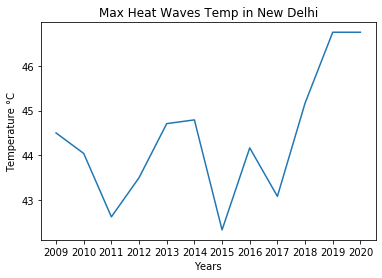

In [88]:
plt.title('Max Heat Waves Temp in New Delhi')

plt.plot(max_daily_heat_waves_temp['Year'], max_daily_heat_waves_temp['WindChillC']) 

plt.xlabel('Years')
plt.ylabel('Temperature °C')

#plt.legend(loc="upper left")
plt.show()

In [89]:
max_daily_heat_waves_temp.rename({'WindChillC':'max_daily_heat_waves_temp'}, axis=1, inplace=True)

In [90]:
max_daily_heat_waves_temp = max_daily_heat_waves_temp.reset_index(drop=True)

# Feature 12 - Number of Extreme Heat Waves Days

In [91]:
# Prepare data Set
ext_heat_waves_temp = mean_temp.groupby(['Day','Month','Year'])['WindChillC'].mean().reset_index()
ext_heat_waves_temp = ext_heat_waves_temp.sort_values(['Year','Month','Day'],ascending=[True,True,True])
ext_heat_waves_temp.reset_index(inplace=True)
ext_heat_waves_temp.drop(columns=['index'],inplace=True)

In [92]:
# If equal or higher then 28 degree call as extremely hot days
ext_heat_waves_temp['Number_of_Hot_Days'] = ext_heat_waves_temp['WindChillC'].apply(lambda x: 1 if x >= 30 else 0)
ext_heat_waves_temp = ext_heat_waves_temp[ext_heat_waves_temp['Number_of_Hot_Days'] == 1]
ext_heat_waves_temp = ext_heat_waves_temp.groupby(['Year'])['Number_of_Hot_Days'].count().reset_index()

In [93]:
if ext_heat_waves_temp['Number_of_Hot_Days'][len(ext_heat_waves_temp['Number_of_Hot_Days'])-1] < ext_heat_waves_temp['Number_of_Hot_Days'][len(ext_heat_waves_temp['Number_of_Hot_Days'])-2]:
    ext_heat_waves_temp['Number_of_Hot_Days'][len(ext_heat_waves_temp['Number_of_Hot_Days'])-1] = ext_heat_waves_temp['Number_of_Hot_Days'][len(ext_heat_waves_temp['Number_of_Hot_Days'])-2]

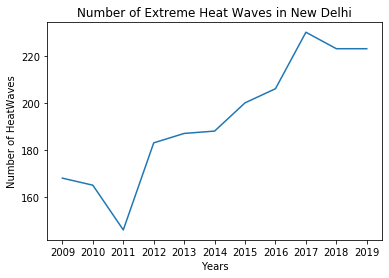

In [94]:
plt.title('Number of Extreme Heat Waves in New Delhi')

plt.plot(ext_heat_waves_temp['Year'], ext_heat_waves_temp['Number_of_Hot_Days']) 

plt.xlabel('Years')
plt.ylabel('Number of HeatWaves')

#plt.legend(loc="upper left")
plt.show()

In [95]:
ext_heat_waves_temp.rename({'Number_of_Hot_Days':'Number_of_Ext_Heat_Waves_Days'}, axis=1, inplace=True)

In [96]:
# Create new rows

ext_heat_waves_temp_after = {'Year':[2020],'Number_of_Ext_Heat_Waves_Days':[np.nan]}
ext_heat_waves_temp_after = pd.DataFrame(ext_heat_waves_temp_after)

# Fill to backwards

ext_heat_waves_temp = pd.concat([ext_heat_waves_temp,ext_heat_waves_temp_after])
ext_heat_waves_temp = ext_heat_waves_temp.ffill(axis ='rows')

In [97]:
ext_heat_waves_temp = ext_heat_waves_temp.reset_index(drop=True)

# Feature 13 - Mean Humidity

In [98]:
# Prepare data Set
mean_humidity = mean_temp.groupby(['Day','Month','Year'])['humidity'].mean().reset_index()
mean_humidity = mean_humidity.sort_values(['Year','Month','Day'],ascending=[True,True,True])
mean_humidity.reset_index(inplace=True)
mean_humidity.drop(columns=['index'],inplace=True)

In [99]:
# Calculate annual mean feel temperature
mean_humidity = mean_humidity[['Year','humidity']]
mean_humidity = mean_humidity.groupby(['Year'])['humidity'].mean().reset_index()

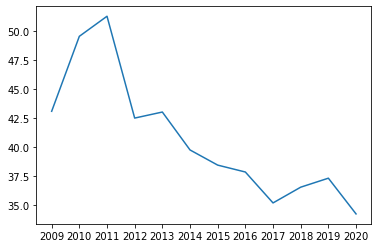

In [100]:
plt.plot(mean_humidity['Year'], mean_humidity['humidity']) 

In [101]:
mean_humidity = mean_humidity.reset_index(drop=True)

# Feature 14 - Mean precipation

In [102]:
# Prepare data Set
mean_precipetion = mean_temp.groupby(['Day','Month','Year'])['precipMM'].mean().reset_index()
mean_precipetion = mean_precipetion.sort_values(['Year','Month','Day'],ascending=[True,True,True])
mean_precipetion.reset_index(inplace=True)
mean_precipetion.drop(columns=['index'],inplace=True)

In [103]:
# Calculate annual mean feel temperature
mean_precipetion = mean_precipetion[['Year','precipMM']]
mean_precipetion = mean_precipetion.groupby(['Year'])['precipMM'].mean().reset_index()

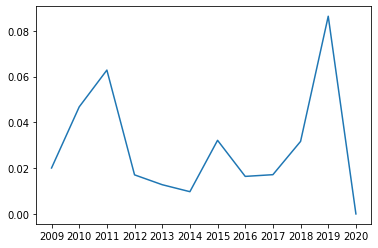

In [104]:
plt.plot(mean_precipetion['Year'], mean_precipetion['precipMM']) 

In [105]:
if mean_precipetion['precipMM'][len(mean_precipetion['precipMM'])-1] < mean_precipetion['precipMM'][len(mean_precipetion['precipMM'])-2]:
    mean_precipetion['precipMM'][len(mean_precipetion['precipMM'])-1] = mean_precipetion['precipMM'][len(mean_precipetion['precipMM'])-2]

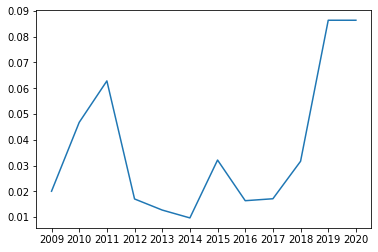

In [106]:
plt.plot(mean_precipetion['Year'], mean_precipetion['precipMM']) 

In [107]:
mean_precipetion.rename({'precipMM':'Precipetion'}, axis=1, inplace=True)

In [108]:
mean_precipetion = mean_precipetion.reset_index(drop=True)

# Feature 15 - GDP

In [109]:
# Create new rows

gdp_before = {'Year':[2009,2010],'GDP':[np.nan,np.nan]}
gdp_before = pd.DataFrame(gdp_before)

In [110]:
# Concat two dataframes

gdp = pd.concat([gdp_before,gdp])

In [111]:
# Fill to backwards

gdp = gdp.bfill(axis ='rows')

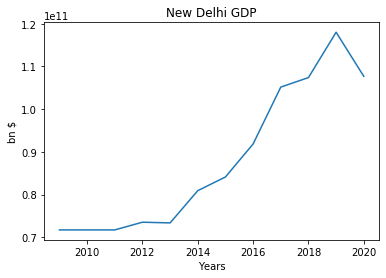

In [112]:
plt.title('New Delhi GDP')

plt.plot(gdp['Year'], gdp['GDP']) 

plt.xlabel('Years')
plt.ylabel('bn $')

#plt.legend(loc="upper left")
plt.show()

In [113]:
gdp = gdp.reset_index(drop=True)

# Feature 16 - Weather Quality

In [114]:
weather_quality = weather_quality[weather_quality['City'] == 'Delhi']
weather_quality = weather_quality.reset_index(drop=True)

In [115]:
weather_quality[['Year','Month-Date']] = weather_quality['Date'].str.split('-',n=1,expand=True)

In [116]:
weather_quality = weather_quality[['Year','AQI']]

In [117]:
weather_quality = weather_quality.groupby(['Year'])['AQI'].mean().reset_index()

In [118]:
# Create new rows

weather_before = {'Year':[2009,2010,2011,2012,2013,2014],'AQI':[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]}
weather_before = pd.DataFrame(weather_before)

In [119]:
weather_quality = pd.concat([weather_before,weather_quality])
weather_quality = weather_quality.bfill(axis ='rows')

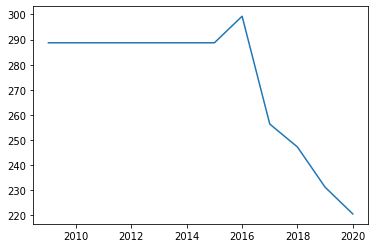

In [120]:
plt.plot(weather_quality['Year'], weather_quality['AQI']) 

In [121]:
weather_quality.rename({'AQI':'Weather Quality'}, axis=1, inplace=True)

In [122]:
weather_quality = weather_quality.reset_index(drop=True)

# Feature 17 - Labor Productivity_1

In [123]:
# fill the nan data with ffill
labor_pro_1 = labor_pro_1.iloc[1:,]
labor_pro_1 = labor_pro_1.ffill(axis ='rows')

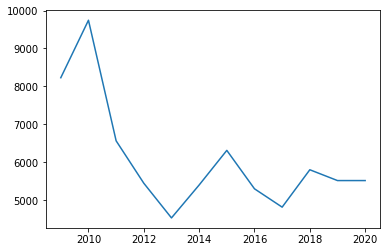

In [124]:
plt.plot(labor_pro_1['Year'], labor_pro_1['Labor Productivity']) 

In [125]:
labor_pro_1 = labor_pro_1.reset_index(drop=True)

# Feature 18 - Labor Productivity_2

In [126]:
# fill the nan data with ffill
labor_pro_2 = labor_pro_2.iloc[1:,]
labor_pro_2 = labor_pro_2[['Time','Value']]
labor_pro_2.rename({'Time':'Year','Value':'Labor_Productivity_2'}, axis=1, inplace=True)

In [127]:
labor_pro_2 = labor_pro_2.reset_index(drop=True)
labor_pro_2['Year'] = labor_pro_2['Year'].astype(str)

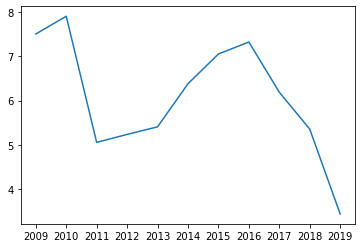

In [128]:
plt.plot(labor_pro_2['Year'], labor_pro_2['Labor_Productivity_2']) 

In [129]:
# Create new rows

labor_pro_2_after = {'Year':[2020],'Labor_Productivity_2':[np.nan]}
labor_pro_2_after = pd.DataFrame(labor_pro_2_after)

# Fill to backwards

labor_pro_2 = pd.concat([labor_pro_2,labor_pro_2_after])
labor_pro_2 = labor_pro_2.ffill(axis ='rows')
labor_pro_2 = labor_pro_2.reset_index(drop=True)

# Concat the Features

In [130]:
final_dataset = pd.concat([mean_temp_daily,summer_mean_temp,ext_hot_days,max_daily_temp,mean_feel_temp,
                           summer_mean_feel_temp,mean_uv,summer_mean_uv,heat_temp,summer_wind_temp,max_daily_heat_waves_temp,
                           ext_heat_waves_temp,mean_humidity,mean_precipetion,gdp,weather_quality,labor_pro_1,
                           labor_pro_2],axis=1)

In [131]:
final_dataset = final_dataset[['Year','Mean_Temp','Summer_Mean_Temp','Number_of_Hot_Days','Max_Daily_Temp',
                               'Mean_Feels_Temp','Summer_Mean_Feels_Temp','uvIndex','Summer_uvIndex',
                               'Mean_Heat_Waves_Temp','Summer_Mean_Heat_Waves_Temp','max_daily_heat_waves_temp',
                               'Number_of_Ext_Heat_Waves_Days','humidity','Precipetion', 'Weather Quality',
                               'Labor Productivity','Labor_Productivity_2','GDP']]

In [132]:
final_dataset = final_dataset.iloc[:,17:]

In [133]:
final_dataset['Year'] = final_dataset['Year'].astype(float)

In [134]:
final_dataset

,Year,Mean_Temp,Summer_Mean_Temp,Number_of_Hot_Days,Max_Daily_Temp,Mean_Feels_Temp,Summer_Mean_Feels_Temp,uvIndex,Summer_uvIndex,Mean_Heat_Waves_Temp,Summer_Mean_Heat_Waves_Temp,max_daily_heat_waves_temp,Number_of_Ext_Heat_Waves_Days,humidity,Precipetion,Weather Quality,Labor Productivity,Labor_Productivity_2,GDP
0,2009.0,26.067808,33.861866,142.0,41.208333,30.504338,40.293931,6.638356,8.043478,28.795890,35.579257,44.500000,168.0,43.089269,0.020068,288.723288,8229.0,7.50,7.173982e+10
1,2010.0,25.749315,32.528986,117.0,39.750000,30.600000,38.850543,6.493151,7.652174,28.591324,33.968750,44.041667,165.0,49.544635,0.046769,288.723288,9745.0,7.90,7.173982e+10
2,2011.0,24.794521,31.234149,90.0,38.666667,29.535160,38.250906,6.287671,7.326087,27.525114,32.442935,42.625000,146.0,51.273744,0.062842,288.723288,6565.0,5.06,7.173982e+10
3,2012.0,25.531193,34.258605,129.0,40.208333,29.338798,39.782609,6.510929,8.141304,28.137750,35.615942,43.500000,183.0,42.503529,0.017065,288.723288,5447.0,5.24,7.354429e+10
4,2013.0,25.950000,33.366848,153.0,40.541667,29.682306,39.341033,6.627397,7.978261,28.355023,34.593750,44.708333,187.0,43.023744,0.012763,288.723288,4532.0,5.41,7.337951e+10
5,2014.0,25.958676,35.116395,156.0,41.458333,29.368151,40.010870,6.627397,8.478261,28.492808,36.634964,44.791667,188.0,39.759132,0.009715,288.723288,5400.0,6.38,8.092474e+10
6,2015.0,26.665183,33.348732,164.0,39.583333,30.026826,37.982337,6.739726,8.054348,29.073516,34.385417,42.333333,200.0,38.453311,0.032158,288.723288,6313.0,7.05,8.413267e+10
7,2016.0,27.001366,33.132699,169.0,40.250000,30.956967,39.504529,6.841530,7.847826,29.581967,34.272192,44.166667,206.0,37.858379,0.016393,299.301370,5300.0,7.32,9.185428e+10
8,2017.0,27.483105,33.921196,197.0,40.833333,31.183790,39.226449,6.915068,8.065217,30.096119,35.056159,43.083333,230.0,35.196689,0.017146,256.323034,4816.0,6.19,1.051743e+11
9,2018.0,28.009132,34.366848,177.0,40.958333,32.436986,40.542572,6.986301,8.054348,30.907877,35.524004,45.166667,223.0,36.552055,0.031678,247.178082,5802.0,5.36,1.073986e+11


# APPLY MACHINE LEARNING

# TASK 1

# Test and Train Split

In [135]:
x = final_dataset.iloc[:,:18]

In [136]:
y = final_dataset['GDP']

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

# Model Building

## Model_1 - Linear Regression

In [138]:
lr_1 = LinearRegression()
lr_1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
# Calculates Error Rates

LR_prediction = lr_1.predict(x_test)
LR_prediction = pd.DataFrame(LR_prediction, columns=['Prediction_LR'])
LR_prediction = LR_prediction.astype(float)
y_test = y_test.reset_index(drop=True)
LR_prediction = pd.concat([LR_prediction,y_test],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

LR_prediction['diff2'] = abs(LR_prediction['Prediction_LR'] - LR_prediction['GDP'])
Sum_Absolute_Error_LR = np.sum(LR_prediction['diff2'])
Sum_Absolute_Error_LR = Sum_Absolute_Error_LR/LR_prediction['diff2'].size

In [140]:
print('MAE is', float(Sum_Absolute_Error_LR))
print('MAE % is', (LR_prediction['diff2'].sum()/LR_prediction['GDP'].sum()*100))

MAE is 7128624671.730541
MAE % is 7.440934909886403


## Model_2 - SVM Regression

In [141]:
from sklearn import svm

In [142]:
svr_reg_1 = svm.SVR()
svr_reg_1.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [143]:
# Calculates Error Rates

SVM_Prediction = svr_reg_1.predict(x_test)
SVM_Prediction = pd.DataFrame(SVM_Prediction, columns=['Prediction_SVM'])
SVM_Prediction = SVM_Prediction.astype(float)
y_test = y_test.reset_index(drop=True)
SVM_Prediction = pd.concat([SVM_Prediction,y_test],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

SVM_Prediction['diff2'] = abs(SVM_Prediction['Prediction_SVM'] - SVM_Prediction['GDP'])
Sum_Absolute_Error_SV = np.sum(SVM_Prediction['diff2'])
Sum_Absolute_Error_SV = Sum_Absolute_Error_SV/SVM_Prediction['diff2'].size

In [144]:
SVM_Prediction

,Prediction_SVM,GDP,diff2
0,7.723452e+10,8.413267e+10,6.898158e+09
1,7.723452e+10,1.076873e+11,3.045283e+10
2,7.723452e+10,7.337951e+10,3.855003e+09
3,7.723452e+10,1.180117e+11,4.077718e+10


In [145]:
print('MAE is', Sum_Absolute_Error_SV.round())
print('MAE % is', ((SVM_Prediction['diff2'].sum()/SVM_Prediction['GDP'].sum()*100).round(decimals=2)))

MAE is 20495794181.0
MAE % is 21.39


## Model_3 - DecisionTree Regressor

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
DT_reg_1 = DecisionTreeRegressor(random_state=0)
DT_reg_1.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [148]:
# Calculates Error Rates

DTR_Prediction = DT_reg_1.predict(x_test)
DTR_Prediction = pd.DataFrame(DTR_Prediction, columns=['DTR_Prediction'])
DTR_Prediction = DTR_Prediction.astype(float)
y_test = y_test.reset_index(drop=True)
DTR_Prediction = pd.concat([DTR_Prediction,y_test],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

DTR_Prediction['diff2'] = abs(DTR_Prediction['DTR_Prediction'] - DTR_Prediction['GDP'])
Sum_Absolute_Error_DTR = np.sum(DTR_Prediction['diff2'])
Sum_Absolute_Error_DTR = Sum_Absolute_Error_DTR/DTR_Prediction['diff2'].size

In [149]:
DTR_Prediction

,DTR_Prediction,GDP,diff2
0,7.173982e+10,8.413267e+10,1.239286e+10
1,1.073986e+11,1.076873e+11,2.887702e+08
2,8.092474e+10,7.337951e+10,7.545227e+09
3,1.073986e+11,1.180117e+11,1.061312e+10


In [150]:
print('MAE is', Sum_Absolute_Error_DTR.round())
print('MAE % is', ((DTR_Prediction['diff2'].sum()/DTR_Prediction['GDP'].sum()*100).round(decimals=2)))

MAE is 7709994948.0
MAE % is 8.05


## Model_4 - Random Forest Regression

In [151]:
from sklearn.ensemble import RandomForestRegressor

In [152]:
RFR_1 = RandomForestRegressor(max_depth=2, random_state=0)
RFR_1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [153]:
# Calculates Error Rates

RFR_Prediction = RFR_1.predict(x_test)
RFR_Prediction = pd.DataFrame(RFR_Prediction, columns=['RFR_Prediction'])
RFR_Prediction = RFR_Prediction.astype(float)
y_test = y_test.reset_index(drop=True)
RFR_Prediction = pd.concat([RFR_Prediction,y_test],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

RFR_Prediction['diff2'] = abs(RFR_Prediction['RFR_Prediction'] - RFR_Prediction['GDP'])
Sum_Absolute_Error_RFR = np.sum(RFR_Prediction['diff2'])
Sum_Absolute_Error_RFR = Sum_Absolute_Error_RFR/RFR_Prediction['diff2'].size

In [154]:
RFR_Prediction

,RFR_Prediction,GDP,diff2
0,8.566367e+10,8.413267e+10,1.530993e+09
1,1.049544e+11,1.076873e+11,2.732905e+09
2,8.168872e+10,7.337951e+10,8.309207e+09
3,1.049544e+11,1.180117e+11,1.305726e+10


In [155]:
print('MAE is', Sum_Absolute_Error_RFR.round())
print('MAE % is', ((RFR_Prediction['diff2'].sum()/RFR_Prediction['GDP'].sum()*100).round(decimals=2)))

MAE is 6407590884.0
MAE % is 6.69


The selected Model are Linear Regression and Random Forest Regression. They have the lowest the MSE and MAE. 

# Future Selection

In [156]:
final_dataset = final_dataset
final_dataset_2 = final_dataset.drop(columns=['Precipetion','humidity'])

Take out the 'Precipetion' and 'humidity, then run the model again to test error rate

# CONTINUE...

# Test and Train Split

In [157]:
x_2 = final_dataset_2.iloc[:,:16]

In [158]:
y_2 = final_dataset_2['GDP']

In [159]:
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.33, random_state=0)

## Model_1 - Linear Regression

In [160]:
lr_2 = LinearRegression()
lr_2.fit(x_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
# Calculates Error Rates

LR_prediction_final = lr_2.predict(x_test_2)
LR_prediction_final = pd.DataFrame(LR_prediction_final, columns=['Prediction_LR'])
LR_prediction_final = LR_prediction_final.astype(float)
y_test_2 = y_test_2.reset_index(drop=True)
LR_prediction_final = pd.concat([LR_prediction_final,y_test_2],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

LR_prediction_final['diff2'] = abs(LR_prediction_final['Prediction_LR'] - LR_prediction_final['GDP'])
Sum_Absolute_Error_LR = np.sum(LR_prediction_final['diff2'])
Sum_Absolute_Error_LR = Sum_Absolute_Error_LR/LR_prediction_final['diff2'].size

In [162]:
LR_prediction_final

,Prediction_LR,GDP,diff2
0,8.826356e+10,8.413267e+10,4.130886e+09
1,1.169766e+11,1.076873e+11,9.289297e+09
2,8.344798e+10,7.337951e+10,1.006846e+10
3,1.127849e+11,1.180117e+11,5.226789e+09


In [163]:
print('MAE is', Sum_Absolute_Error_LR.round())
print('MAE % is', ((LR_prediction_final['diff2'].sum()/LR_prediction_final['GDP'].sum()*100).round(decimals=2)))

MAE is 7178858636.0
MAE % is 7.49


# Model_2 - Random Forest Regression

In [164]:
from sklearn.ensemble import RandomForestRegressor

In [165]:
RFR_2 = RandomForestRegressor(max_depth=2, random_state=0)
RFR_2.fit(x_train_2, y_train_2)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [166]:
# Calculates Error Rates

RFR_Prediction_final = RFR_2.predict(x_test_2)
RFR_Prediction_final = pd.DataFrame(RFR_Prediction_final, columns=['RFR_Prediction'])
RFR_Prediction_final = RFR_Prediction_final.astype(float)
y_test_2 = y_test_2.reset_index(drop=True)
RFR_Prediction_final = pd.concat([RFR_Prediction_final,y_test_2],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

RFR_Prediction_final['diff2'] = abs(RFR_Prediction_final['RFR_Prediction'] - RFR_Prediction_final['GDP'])
Sum_Absolute_Error_RFR = np.sum(RFR_Prediction_final['diff2'])
Sum_Absolute_Error_RFR = Sum_Absolute_Error_RFR/RFR_Prediction_final['diff2'].size

In [167]:
RFR_Prediction_final

,RFR_Prediction,GDP,diff2
0,8.824180e+10,8.413267e+10,4.109122e+09
1,1.027519e+11,1.076873e+11,4.935436e+09
2,7.618974e+10,7.337951e+10,2.810225e+09
3,1.027519e+11,1.180117e+11,1.525979e+10


In [168]:
print('MAE is', Sum_Absolute_Error_RFR.round())
print('MAE % is', ((RFR_Prediction_final['diff2'].sum()/RFR_Prediction_final['GDP'].sum()*100).round(decimals=2)))

MAE is 6778643188.0
MAE % is 7.08


The selected Model is Random Forest Regression. It has the lowest the MSE and MAE. 

# END OF THE FIRST TASK

# Update the independent features for prediction GDP

# MACHINE LEARNING MODELS FOR UPDATING THE INDEPENDENT PARAMETERS

## 1 - Mean Temp

In [169]:
# Predict the Mean Temp for 2035, 2040, 2045, 2050, 2100

mean_temp = final_dataset[['Year','Mean_Temp']]

x = mean_temp[['Year']]
y = mean_temp['Mean_Temp']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

mean_temp_prediction_2035 = lr.predict([[2035.0]])
mean_temp_prediction_2040 = lr.predict([[2040.0]])
mean_temp_prediction_2045 = lr.predict([[2045.0]])
mean_temp_prediction_2050 = lr.predict([[2050.0]])

## 2 - Summer_Mean_Temp

In [170]:
# Predict the Summer_Mean_Temp for 2035, 2040, 2045, 2050, 2100

Summer_Mean_Temp = final_dataset[['Year','Summer_Mean_Temp']]

x = Summer_Mean_Temp[['Year']]
y = Summer_Mean_Temp['Summer_Mean_Temp']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Summer_Mean_Temp_prediction_2035 = lr.predict([[2035.0]])
Summer_Mean_Temp_prediction_2040 = lr.predict([[2040.0]])
Summer_Mean_Temp_prediction_2045 = lr.predict([[2045.0]])
Summer_Mean_Temp_prediction_2050 = lr.predict([[2050.0]])

## 3 - Number_of_Hot_Days

In [171]:
# Predict the Number_of_Hot_Days for 2035, 2040, 2045, 2050, 2100

Number_of_Hot_Days = final_dataset[['Year','Number_of_Hot_Days']]

x = Number_of_Hot_Days[['Year']]
y = Number_of_Hot_Days['Number_of_Hot_Days']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Number_of_Hot_Days_prediction_2035 = lr.predict([[2035.0]])
Number_of_Hot_Days_prediction_2040 = lr.predict([[2040.0]])
Number_of_Hot_Days_prediction_2045 = lr.predict([[2045.0]])
Number_of_Hot_Days_prediction_2050 = lr.predict([[2050.0]])

## 4 - Max_Daily_Temp

In [172]:
# Predict the Max_Daily_Temp for 2035, 2040, 2045, 2050, 2100

Max_Daily_Temp = final_dataset[['Year','Max_Daily_Temp']]

x = Max_Daily_Temp[['Year']]
y = Max_Daily_Temp['Max_Daily_Temp']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Max_Daily_Temp_prediction_2035 = lr.predict([[2035.0]])
Max_Daily_Temp_prediction_2040 = lr.predict([[2040.0]])
Max_Daily_Temp_prediction_2045 = lr.predict([[2045.0]])
Max_Daily_Temp_prediction_2050 = lr.predict([[2050.0]])

## 5 - Mean_Feels_Temp

In [173]:
# Predict the Mean_Feels_Temp for 2035, 2040, 2045, 2050, 2100

Mean_Feels_Temp = final_dataset[['Year','Mean_Feels_Temp']]

x = Mean_Feels_Temp[['Year']]
y = Mean_Feels_Temp['Mean_Feels_Temp']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Mean_Feels_Temp_prediction_2035 = lr.predict([[2035.0]])
Mean_Feels_Temp_prediction_2040 = lr.predict([[2040.0]])
Mean_Feels_Temp_prediction_2045 = lr.predict([[2045.0]])
Mean_Feels_Temp_prediction_2050 = lr.predict([[2050.0]])

## 6 - Summer_Mean_Feels_Temp

In [174]:
# Predict the Summer_Mean_Feels_Temp for 2035, 2040, 2045, 2050, 2100

Summer_Mean_Feels_Temp = final_dataset[['Year','Summer_Mean_Feels_Temp']]

x = Summer_Mean_Feels_Temp[['Year']]
y = Summer_Mean_Feels_Temp['Summer_Mean_Feels_Temp']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Summer_Mean_Feels_Temp_prediction_2035 = lr.predict([[2035.0]])
Summer_Mean_Feels_Temp_prediction_2040 = lr.predict([[2040.0]])
Summer_Mean_Feels_Temp_prediction_2045 = lr.predict([[2045.0]])
Summer_Mean_Feels_Temp_prediction_2050 = lr.predict([[2050.0]])

## 7 - uvIndex

In [175]:
# Predict the uvIndex for 2035, 2040, 2045, 2050, 2100

uvIndex = final_dataset[['Year','uvIndex']]

x = uvIndex[['Year']]
y = uvIndex['uvIndex']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

uvIndex_prediction_2035 = lr.predict([[2035.0]])
uvIndex_prediction_2040 = lr.predict([[2040.0]])
uvIndex_prediction_2045 = lr.predict([[2045.0]])
uvIndex_prediction_2050 = lr.predict([[2050.0]])

## 8 - Summer_uvIndex

In [176]:
# Predict the uvIndex for 2035, 2040, 2045, 2050, 2100

Summer_uvIndex = final_dataset[['Year','Summer_uvIndex']]

x = Summer_uvIndex[['Year']]
y = Summer_uvIndex['Summer_uvIndex']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Summer_uvIndex_prediction_2035 = lr.predict([[2035.0]])
Summer_uvIndex_prediction_2040 = lr.predict([[2040.0]])
Summer_uvIndex_prediction_2045 = lr.predict([[2045.0]])
Summer_uvIndex_prediction_2050 = lr.predict([[2050.0]])

## 9 - Mean_Heat_Waves_Temp

In [177]:
# Predict the uvIndex for 2035, 2040, 2045, 2050, 2100

Mean_Heat_Waves_Temp = final_dataset[['Year','Mean_Heat_Waves_Temp']]

x = Mean_Heat_Waves_Temp[['Year']]
y = Mean_Heat_Waves_Temp['Mean_Heat_Waves_Temp']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Mean_Heat_Waves_Temp_prediction_2035 = lr.predict([[2035.0]])
Mean_Heat_Waves_Temp_prediction_2040 = lr.predict([[2040.0]])
Mean_Heat_Waves_Temp_prediction_2045 = lr.predict([[2045.0]])
Mean_Heat_Waves_Temp_prediction_2050 = lr.predict([[2050.0]])

## 10 - Summer_Mean_Heat_Waves_Temp

In [178]:
# Predict the uvIndex for 2035, 2040, 2045, 2050, 2100

Summer_Mean_Heat_Waves_Temp = final_dataset[['Year','Summer_Mean_Heat_Waves_Temp']]

x = Summer_Mean_Heat_Waves_Temp[['Year']]
y = Summer_Mean_Heat_Waves_Temp['Summer_Mean_Heat_Waves_Temp']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Summer_Mean_Heat_Waves_Temp_prediction_2035 = lr.predict([[2035.0]])
Summer_Mean_Heat_Waves_Temp_prediction_2040 = lr.predict([[2040.0]])
Summer_Mean_Heat_Waves_Temp_prediction_2045 = lr.predict([[2045.0]])
Summer_Mean_Heat_Waves_Temp_prediction_2050 = lr.predict([[2050.0]])

## 11 - max_daily_heat_waves_temp

In [179]:
# Predict the uvIndex for 2035, 2040, 2045, 2050, 2100

max_daily_heat_waves_temp = final_dataset[['Year','max_daily_heat_waves_temp']]

x = max_daily_heat_waves_temp[['Year']]
y = max_daily_heat_waves_temp['max_daily_heat_waves_temp']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

max_daily_heat_waves_temp_prediction_2035 = lr.predict([[2035.0]])
max_daily_heat_waves_temp_prediction_2040 = lr.predict([[2040.0]])
max_daily_heat_waves_temp_prediction_2045 = lr.predict([[2045.0]])
max_daily_heat_waves_temp_prediction_2050 = lr.predict([[2050.0]])

## 12 - Number_of_Ext_Heat_Waves_Days

In [180]:
# Predict the uvIndex for 2035, 2040, 2045, 2050, 2100

Number_of_Ext_Heat_Waves_Days = final_dataset[['Year','Number_of_Ext_Heat_Waves_Days']]

x = Number_of_Ext_Heat_Waves_Days[['Year']]
y = Number_of_Ext_Heat_Waves_Days['Number_of_Ext_Heat_Waves_Days']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Number_of_Ext_Heat_Waves_Days_prediction_2035 = lr.predict([[2035.0]])
Number_of_Ext_Heat_Waves_Days_prediction_2040 = lr.predict([[2040.0]])
Number_of_Ext_Heat_Waves_Days_prediction_2045 = lr.predict([[2045.0]])
Number_of_Ext_Heat_Waves_Days_prediction_2050 = lr.predict([[2050.0]])

## 13 - humidity

In [181]:
# Predict the uvIndex for 2035, 2040, 2045, 2050, 2100

humidity = final_dataset[['Year','humidity']]

x = humidity[['Year']]
y = humidity['humidity']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

humidity_prediction_2035 = lr.predict([[2035.0]])
humidity_prediction_2040 = lr.predict([[2040.0]])
humidity_prediction_2045 = lr.predict([[2045.0]])
humidity_prediction_2050 = lr.predict([[2050.0]])

## 14 - Precipetion

In [182]:
# Predict the uvIndex for 2035, 2040, 2045, 2050, 2100

Precipetion = final_dataset[['Year','Precipetion']]

x = Precipetion[['Year']]
y = Precipetion['Precipetion']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Precipetion_prediction_2035 = lr.predict([[2035.0]])
Precipetion_prediction_2040 = lr.predict([[2040.0]])
Precipetion_prediction_2045 = lr.predict([[2045.0]])
Precipetion_prediction_2050 = lr.predict([[2050.0]])

## 15 - Weather Quality

In [183]:
# Predict the uvIndex for 2035, 2040, 2045, 2050, 2100

Weather_Quality = final_dataset[['Year','Weather Quality']]

x = Weather_Quality[['Year']]
y = Weather_Quality['Weather Quality']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Weather_Quality_prediction_2035 = lr.predict([[2035.0]])
Weather_Quality_prediction_2040 = lr.predict([[2040.0]])
Weather_Quality_prediction_2045 = lr.predict([[2045.0]])
Weather_Quality_prediction_2050 = lr.predict([[2050.0]])

## 16 - Labor Productivity

In [184]:
# Predict the uvIndex for 2035, 2040, 2045, 2050, 2100

Labor_Productivity = final_dataset[['Year','Labor Productivity']]

x = Labor_Productivity[['Year']]
y = Labor_Productivity['Labor Productivity']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Labor_Productivity_prediction_2035 = lr.predict([[2035.0]])
Labor_Productivity_prediction_2040 = lr.predict([[2040.0]])
Labor_Productivity_prediction_2045 = lr.predict([[2045.0]])
Labor_Productivity_prediction_2050 = lr.predict([[2050.0]])

## 17 - Labor Productivity

In [185]:
# Predict the uvIndex for 2035, 2040, 2045, 2050, 2100

Labor_Productivity_2 = final_dataset[['Year','Labor_Productivity_2']]

x = Labor_Productivity_2[['Year']]
y = Labor_Productivity_2['Labor_Productivity_2']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)

Labor_Productivity_2_prediction_2035 = lr.predict([[2035.0]])
Labor_Productivity_2_prediction_2040 = lr.predict([[2040.0]])
Labor_Productivity_2_prediction_2045 = lr.predict([[2045.0]])
Labor_Productivity_2_prediction_2050 = lr.predict([[2050.0]])

# END OF THE UPDATES MODEL

# APPLY THE FIRST TASK TO GDP

# Prediction for 2035, 2040, 2045 and 2050 

In [186]:
GDP_2035 = lr_2.predict([[2035.0,
                              mean_temp_prediction_2035[0],
                              Summer_Mean_Temp_prediction_2035[0],
                              Number_of_Hot_Days_prediction_2035[0],
                              Max_Daily_Temp_prediction_2035[0],
                              Mean_Feels_Temp_prediction_2035[0],
                              Summer_Mean_Feels_Temp_prediction_2035[0],
                              uvIndex_prediction_2035[0],
                              Summer_uvIndex_prediction_2035[0],
                              Mean_Heat_Waves_Temp_prediction_2035[0],
                              Summer_Mean_Heat_Waves_Temp_prediction_2035[0],
                              max_daily_heat_waves_temp_prediction_2035[0],
                              Number_of_Ext_Heat_Waves_Days_prediction_2035[0],
                              Weather_Quality_prediction_2035[0],
                              Labor_Productivity_prediction_2035[0],
                              Labor_Productivity_2_prediction_2035[0]]])            

In [187]:
GDP_2040 = lr_2.predict([[2040.0,
                              mean_temp_prediction_2040[0],
                              Summer_Mean_Temp_prediction_2040[0],
                              Number_of_Hot_Days_prediction_2040[0],
                              Max_Daily_Temp_prediction_2040[0],
                              Mean_Feels_Temp_prediction_2040[0],
                              Summer_Mean_Feels_Temp_prediction_2040[0],
                              uvIndex_prediction_2040[0],
                              Summer_uvIndex_prediction_2040[0],
                              Mean_Heat_Waves_Temp_prediction_2040[0],
                              Summer_Mean_Heat_Waves_Temp_prediction_2040[0],
                              max_daily_heat_waves_temp_prediction_2040[0],
                              Number_of_Ext_Heat_Waves_Days_prediction_2040[0],
                              Weather_Quality_prediction_2040[0],
                              Labor_Productivity_prediction_2040[0],
                              Labor_Productivity_2_prediction_2040[0]]])

In [188]:
GDP_2045 = lr_2.predict([[2045.0,
                              mean_temp_prediction_2045[0],
                              Summer_Mean_Temp_prediction_2045[0],
                              Number_of_Hot_Days_prediction_2045[0],
                              Max_Daily_Temp_prediction_2045[0],
                              Mean_Feels_Temp_prediction_2045[0],
                              Summer_Mean_Feels_Temp_prediction_2045[0],
                              uvIndex_prediction_2045[0],
                              Summer_uvIndex_prediction_2045[0],
                              Mean_Heat_Waves_Temp_prediction_2045[0],
                              Summer_Mean_Heat_Waves_Temp_prediction_2045[0],
                              max_daily_heat_waves_temp_prediction_2045[0],
                              Number_of_Ext_Heat_Waves_Days_prediction_2045[0],
                              Weather_Quality_prediction_2045[0],
                              Labor_Productivity_prediction_2045[0],
                              Labor_Productivity_2_prediction_2045[0]]])

In [189]:
GDP_2050 = lr_2.predict([[2050.0,
                              mean_temp_prediction_2050[0],
                              Summer_Mean_Temp_prediction_2050[0],
                              Number_of_Hot_Days_prediction_2050[0],
                              Max_Daily_Temp_prediction_2050[0],
                              Mean_Feels_Temp_prediction_2050[0],
                              Summer_Mean_Feels_Temp_prediction_2050[0],
                              uvIndex_prediction_2050[0],
                              Summer_uvIndex_prediction_2050[0],
                              Mean_Heat_Waves_Temp_prediction_2050[0],
                              Summer_Mean_Heat_Waves_Temp_prediction_2050[0],
                              max_daily_heat_waves_temp_prediction_2050[0],
                              Number_of_Ext_Heat_Waves_Days_prediction_2050[0],
                              Weather_Quality_prediction_2050[0],
                              Labor_Productivity_prediction_2050[0],
                              Labor_Productivity_2_prediction_2050[0]]])

In [190]:
#GDP_2035 = lr_2.predict([[2035.0,30.222603,37.327899,211.0,46.75,31.761758,41.72962,7.441096,8.673913, 
#                              30.28242,37.327899,46.75,223.0,220.50495,5517.0,3.45]])

In [191]:
#GDP_2040 = lr_2.predict([[2040.0,30.222603,37.327899,211.0,46.75,31.761758,41.72962,7.441096,8.673913, 
#                              30.28242,37.327899,46.75,223.0,220.50495,5517.0,3.45]])

In [192]:
#GDP_2045 = lr_2.predict([[2045.0,30.222603,37.327899,211.0,46.75,31.761758,41.72962,7.441096,8.673913, 
#                              30.28242,37.327899,46.75,223.0,220.50495,5517.0,3.45]])

In [193]:
#GDP_2050 = lr_2.predict([[2050.0,30.222603,37.327899,211.0,46.75,31.761758,41.72962,7.441096,8.673913, 
#                              30.28242,37.327899,46.75,223.0,220.50495,5517.0,3.45]])

# TASK 2

# GDP Prediction without Climate Effect

In [194]:
# Determine the climate related features and drop them out from the dataset

final_dataset_2.head(2)

,Year,Mean_Temp,Summer_Mean_Temp,Number_of_Hot_Days,Max_Daily_Temp,Mean_Feels_Temp,Summer_Mean_Feels_Temp,uvIndex,Summer_uvIndex,Mean_Heat_Waves_Temp,Summer_Mean_Heat_Waves_Temp,max_daily_heat_waves_temp,Number_of_Ext_Heat_Waves_Days,Weather Quality,Labor Productivity,Labor_Productivity_2,GDP
0,2009.0,26.067808,33.861866,142.0,41.208333,30.504338,40.293931,6.638356,8.043478,28.795890,35.579257,44.500000,168.0,288.723288,8229.0,7.5,7.173982e+10
1,2010.0,25.749315,32.528986,117.0,39.750000,30.600000,38.850543,6.493151,7.652174,28.591324,33.968750,44.041667,165.0,288.723288,9745.0,7.9,7.173982e+10


In [195]:
final_dataset_3 = final_dataset_2[['Year','Labor Productivity','Labor_Productivity_2','GDP']]

## Test and Train Split

In [196]:
x = final_dataset_3.iloc[:,:3]
y = final_dataset_3['GDP']

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=0)

## Model_1 - Linear Regression

In [198]:
lr_3 = LinearRegression()
lr_3.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [199]:
# Calculates Error Rates

LR_prediction_final_2 = lr_3.predict(x_test)
LR_prediction_final_2 = pd.DataFrame(LR_prediction_final_2, columns=['Prediction_LR'])
LR_prediction_final_2 = LR_prediction_final_2.astype(float)
y_test = y_test.reset_index(drop=True)
LR_prediction_final_2 = pd.concat([LR_prediction_final_2,y_test],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

LR_prediction_final_2['diff2'] = abs(LR_prediction_final_2['Prediction_LR'] - LR_prediction_final_2['GDP'])
Sum_Absolute_Error_LR = np.sum(LR_prediction_final_2['diff2'])
Sum_Absolute_Error_LR = Sum_Absolute_Error_LR/LR_prediction_final_2['diff2'].size

In [200]:
LR_prediction_final_2

,Prediction_LR,GDP,diff2
0,9.239289e+10,8.413267e+10,8.260218e+09
1,1.169743e+11,1.076873e+11,9.286905e+09
2,7.778426e+10,7.337951e+10,4.404747e+09
3,1.117624e+11,1.180117e+11,6.249308e+09


In [201]:
print('MAE is', float(Sum_Absolute_Error_LR))
print('MAE % is', (LR_prediction_final_2['diff2'].sum()/LR_prediction_final_2['GDP'].sum()*100))

MAE is 7050294459.868603
MAE % is 7.359172994400284


## Model_2 - SVM Regression

In [202]:
from sklearn import svm

In [203]:
svr_reg_3 = svm.SVR()
svr_reg_3.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [204]:
# Calculates Error Rates

SVM_Prediction = svr_reg_3.predict(x_test)
SVM_Prediction = pd.DataFrame(SVM_Prediction, columns=['Prediction_SVM'])
SVM_Prediction = SVM_Prediction.astype(float)
y_test = y_test.reset_index(drop=True)
SVM_Prediction = pd.concat([SVM_Prediction,y_test],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

SVM_Prediction['diff2'] = abs(SVM_Prediction['Prediction_SVM'] - SVM_Prediction['GDP'])
Sum_Absolute_Error_SV = np.sum(SVM_Prediction['diff2'])
Sum_Absolute_Error_SV = Sum_Absolute_Error_SV/SVM_Prediction['diff2'].size

In [205]:
SVM_Prediction

,Prediction_SVM,GDP,diff2
0,7.723452e+10,8.413267e+10,6.898158e+09
1,7.723452e+10,1.076873e+11,3.045283e+10
2,7.723452e+10,7.337951e+10,3.855003e+09
3,7.723452e+10,1.180117e+11,4.077718e+10


In [206]:
print('MAE is', Sum_Absolute_Error_SV.round())
print('MAE % is', ((SVM_Prediction['diff2'].sum()/SVM_Prediction['GDP'].sum()*100).round(decimals=2)))

MAE is 20495794181.0
MAE % is 21.39


## Model_3 - DecisionTree Regressor

In [207]:
from sklearn.tree import DecisionTreeRegressor

In [208]:
DT_reg_3 = DecisionTreeRegressor(random_state=0)
DT_reg_3.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [209]:
# Calculates Error Rates

DTR_Prediction = DT_reg_3.predict(x_test)
DTR_Prediction = pd.DataFrame(DTR_Prediction, columns=['DTR_Prediction'])
DTR_Prediction = DTR_Prediction.astype(float)
y_test = y_test.reset_index(drop=True)
DTR_Prediction = pd.concat([DTR_Prediction,y_test],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

DTR_Prediction['diff2'] = abs(DTR_Prediction['DTR_Prediction'] - DTR_Prediction['GDP'])
Sum_Absolute_Error_DTR = np.sum(DTR_Prediction['diff2'])
Sum_Absolute_Error_DTR = Sum_Absolute_Error_DTR/DTR_Prediction['diff2'].size

In [210]:
DTR_Prediction

,DTR_Prediction,GDP,diff2
0,8.092474e+10,8.413267e+10,3.207933e+09
1,1.073986e+11,1.076873e+11,2.887702e+08
2,7.354429e+10,7.337951e+10,1.647777e+08
3,1.073986e+11,1.180117e+11,1.061312e+10


In [211]:
print('MAE is', Sum_Absolute_Error_DTR.round())
print('MAE % is', ((DTR_Prediction['diff2'].sum()/DTR_Prediction['GDP'].sum()*100).round(decimals=2)))

MAE is 3568651107.0
MAE % is 3.72


## Model_4 - Random Forest Regression

In [212]:
from sklearn.ensemble import RandomForestRegressor

In [213]:
RFR_3 = RandomForestRegressor(max_depth=2, random_state=0)
RFR_3.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [214]:
# Calculates Error Rates

RFR_Prediction = RFR_3.predict(x_test)
RFR_Prediction = pd.DataFrame(RFR_Prediction, columns=['RFR_Prediction'])
RFR_Prediction = RFR_Prediction.astype(float)
y_test = y_test.reset_index(drop=True)
RFR_Prediction = pd.concat([RFR_Prediction,y_test],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

RFR_Prediction['diff2'] = abs(RFR_Prediction['RFR_Prediction'] - RFR_Prediction['GDP'])
Sum_Absolute_Error_RFR = np.sum(RFR_Prediction['diff2'])
Sum_Absolute_Error_RFR = Sum_Absolute_Error_RFR/RFR_Prediction['diff2'].size

In [215]:
RFR_Prediction

,RFR_Prediction,GDP,diff2
0,8.530876e+10,8.413267e+10,1.176085e+09
1,9.936648e+10,1.076873e+11,8.320865e+09
2,8.039153e+10,7.337951e+10,7.012018e+09
3,9.936648e+10,1.180117e+11,1.864522e+10


In [216]:
print('MAE is', Sum_Absolute_Error_RFR.round())
print('MAE % is', ((RFR_Prediction['diff2'].sum()/RFR_Prediction['GDP'].sum()*100).round(decimals=2)))

MAE is 8788546531.0
MAE % is 9.17


# Model_5 - Lasso Regression

In [217]:
from sklearn import linear_model

In [218]:
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [219]:
# Calculates Error Rates

Lasso_Prediction = clf.predict(x_test)
Lasso_Prediction = pd.DataFrame(Lasso_Prediction, columns=['Lasso_Prediction'])
Lasso_Prediction = Lasso_Prediction.astype(float)
y_test = y_test.reset_index(drop=True)
Lasso_Prediction = pd.concat([Lasso_Prediction,y_test],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

Lasso_Prediction['diff2'] = abs(Lasso_Prediction['Lasso_Prediction'] - Lasso_Prediction['GDP'])
Sum_Absolute_Error_Lasso = np.sum(Lasso_Prediction['diff2'])
Sum_Absolute_Error_Lasso = Sum_Absolute_Error_Lasso/Lasso_Prediction['diff2'].size

In [220]:
Lasso_Prediction

,Lasso_Prediction,GDP,diff2
0,9.239289e+10,8.413267e+10,8.260218e+09
1,1.169743e+11,1.076873e+11,9.286905e+09
2,7.778426e+10,7.337951e+10,4.404747e+09
3,1.117624e+11,1.180117e+11,6.249308e+09


In [221]:
print('MAE is', Sum_Absolute_Error_Lasso.round())
print('MAE % is', ((Lasso_Prediction['diff2'].sum()/Lasso_Prediction['GDP'].sum()*100).round(decimals=2)))

MAE is 7050294460.0
MAE % is 7.36


## Future Selection

In [222]:
final_dataset_4 = final_dataset_3.drop(columns=['Labor Productivity','Labor_Productivity_2'])

## Test and Train Split

In [223]:
x_2 = final_dataset_3[['Year']]
y_2 = final_dataset_3['GDP']
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.33, random_state=0)

## Model_1 - Linear Regression

In [224]:
lr_4 = LinearRegression()
lr_4.fit(x_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [225]:
# Calculates Error Rates

LR_prediction_test = lr_4.predict(x_test_2)
LR_prediction_test = pd.DataFrame(LR_prediction, columns=['Prediction_LR'])
LR_prediction_test = LR_prediction_test.astype(float)
y_test_2 = y_test_2.reset_index(drop=True)
LR_prediction_test = pd.concat([LR_prediction_test,y_test_2],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

LR_prediction_test['diff2'] = abs(LR_prediction_test['Prediction_LR'] - LR_prediction_test['GDP'])
Sum_Absolute_Error_LR = np.sum(LR_prediction_test['diff2'])
Sum_Absolute_Error_LR = Sum_Absolute_Error_LR/LR_prediction_test['diff2'].size

In [226]:
LR_prediction_test

,Prediction_LR,GDP,diff2
0,8.806732e+10,8.413267e+10,3.934649e+09
1,1.170873e+11,1.076873e+11,9.399999e+09
2,8.365297e+10,7.337951e+10,1.027346e+10
3,1.131053e+11,1.180117e+11,4.906395e+09


In [227]:
print('MAE is', Sum_Absolute_Error_LR.round())
print('MAE % is', ((LR_prediction['diff2'].sum()/LR_prediction['GDP'].sum()*100).round(decimals=2)))

MAE is 7128624672.0
MAE % is 7.44


The error rate is higher than the previous model with 'Labor Productivity' and 'Labor_Productivity_2 features, 
therefore use the previous model

# Model_2 - DecisionTree Regressor

In [228]:
from sklearn.tree import DecisionTreeRegressor

In [229]:
DT_reg_4 = DecisionTreeRegressor(random_state=0)
DT_reg_4.fit(x_train_2, y_train_2)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [230]:
# Calculates Error Rates

DTR_Prediction_test = DT_reg_4.predict(x_test_2)
DTR_Prediction_test = pd.DataFrame(DTR_Prediction_test, columns=['DTR_Prediction'])
DTR_Prediction_test = DTR_Prediction_test.astype(float)
y_test_2 = y_test_2.reset_index(drop=True)
DTR_Prediction_test = pd.concat([DTR_Prediction_test,y_test_2],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

DTR_Prediction_test['diff2'] = abs(DTR_Prediction_test['DTR_Prediction'] - DTR_Prediction_test['GDP'])
Sum_Absolute_Error_DTR = np.sum(DTR_Prediction_test['diff2'])
Sum_Absolute_Error_DTR = Sum_Absolute_Error_DTR/DTR_Prediction_test['diff2'].size

In [231]:
DTR_Prediction_test

,DTR_Prediction,GDP,diff2
0,8.092474e+10,8.413267e+10,3.207933e+09
1,1.073986e+11,1.076873e+11,2.887702e+08
2,7.354429e+10,7.337951e+10,1.647777e+08
3,1.073986e+11,1.180117e+11,1.061312e+10


In [232]:
print('MAE is', Sum_Absolute_Error_DTR.round())
print('MAE % is', ((DTR_Prediction_test['diff2'].sum()/DTR_Prediction_test['GDP'].sum()*100).round(decimals=2)))

MAE is 3568651107.0
MAE % is 3.72


# Model_5 - Lasso Regression

In [233]:
from sklearn import linear_model

In [234]:
clf_2 = linear_model.Lasso(alpha=0.1)
clf_2.fit(x_train_2, y_train_2)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [235]:
# Calculates Error Rates

Lasso_Prediction = clf_2.predict(x_test_2)
Lasso_Prediction = pd.DataFrame(Lasso_Prediction, columns=['Lasso_Prediction'])
Lasso_Prediction = Lasso_Prediction.astype(float)
y_test_2 = y_test_2.reset_index(drop=True)
Lasso_Prediction = pd.concat([Lasso_Prediction,y_test_2],axis=1)

# MSE

#LR_prediction['diff'] = LR_prediction['Prediction_LR'] - LR_prediction['GDP']
#LR_prediction['diff'] = LR_prediction['diff'] ** 2
#Sum_Squared_Error_LR = np.sum(LR_prediction['diff'])/LR_prediction['diff'].size

# MAE

Lasso_Prediction['diff2'] = abs(Lasso_Prediction['Lasso_Prediction'] - Lasso_Prediction['GDP'])
Sum_Absolute_Error_Lasso = np.sum(Lasso_Prediction['diff2'])
Sum_Absolute_Error_Lasso = Sum_Absolute_Error_Lasso/Lasso_Prediction['diff2'].size

In [236]:
Lasso_Prediction

,Lasso_Prediction,GDP,diff2
0,9.122590e+10,8.413267e+10,7.093225e+09
1,1.126457e+11,1.076873e+11,4.958378e+09
2,8.265797e+10,7.337951e+10,9.278455e+09
3,1.083618e+11,1.180117e+11,9.649940e+09


In [237]:
print('MAE is', Sum_Absolute_Error_Lasso.round())
print('MAE % is', ((Lasso_Prediction['diff2'].sum()/Lasso_Prediction['GDP'].sum()*100).round(decimals=2)))

MAE is 7744999633.0
MAE % is 8.08


## Prediction for 2035, 2040, 2045 and 2050 without Climate Features

In [238]:
final_dataset_3

,Year,Labor Productivity,Labor_Productivity_2,GDP
0,2009.0,8229.0,7.50,7.173982e+10
1,2010.0,9745.0,7.90,7.173982e+10
2,2011.0,6565.0,5.06,7.173982e+10
3,2012.0,5447.0,5.24,7.354429e+10
4,2013.0,4532.0,5.41,7.337951e+10
5,2014.0,5400.0,6.38,8.092474e+10
6,2015.0,6313.0,7.05,8.413267e+10
7,2016.0,5300.0,7.32,9.185428e+10
8,2017.0,4816.0,6.19,1.051743e+11
9,2018.0,5802.0,5.36,1.073986e+11


In [239]:
GDP_2035_wo_cf = clf.predict([[2035.0,5517.0,3.45]])

In [240]:
GDP_2040_wo_cf = clf.predict([[2040.0,5517.0,3.45]])

In [241]:
GDP_2045_wo_cf = clf.predict([[2045.0,5517.0,3.45]])

In [242]:
GDP_2050_wo_cf = clf.predict([[2050.0,5517.0,3.45]])

In [243]:
int(GDP_2035_wo_cf), int(GDP_2040_wo_cf), int(GDP_2045_wo_cf), int(GDP_2050_wo_cf),

(195152152580, 221211452544, 247270752509, 273330052474)

In [244]:
int(GDP_2035), int(GDP_2040), int(GDP_2045), int(GDP_2050),

(176905203786, 198325029863, 219744855940, 241164682017)

## Visualize the Results

### GDP_w_Climate_Effect 

In [245]:
# Convert to DataFrame
GDP_2035 = {'Year':[2035],'GDP_w_Climate_Effect':[GDP_2035[0]]}
GDP_2035 = pd.DataFrame(GDP_2035)

In [246]:
# Convert to DataFrame
GDP_2040 = {'Year':[2040],'GDP_w_Climate_Effect':[GDP_2040[0]]}
GDP_2040 = pd.DataFrame(GDP_2040)

In [247]:
# Convert to DataFrame
GDP_2045 = {'Year':[2045],'GDP_w_Climate_Effect':[GDP_2045[0]]}
GDP_2045 = pd.DataFrame(GDP_2045)

In [248]:
# Convert to DataFrame
GDP_2050 = {'Year':[2050],'GDP_w_Climate_Effect':[GDP_2050[0]]}
GDP_2050 = pd.DataFrame(GDP_2050)

In [249]:
# Concat the dataframes
GDP_w_ce = pd.concat([GDP_2035,GDP_2040,GDP_2045,GDP_2050])
GDP_w_ce['GDP_w_Climate_Effect'] = GDP_w_ce['GDP_w_Climate_Effect'].astype(int)
GDP_w_ce = GDP_w_ce.reset_index()
GDP_w_ce.drop(columns='index',inplace=True)

### GDP_wo_Climate_Effect 

In [250]:
# Convert to DataFrame
GDP_wo_ce_2035 = {'Year':[2035],'GDP_wo_Climate_Effect':[GDP_2035_wo_cf[0]]}
GDP_wo_ce_2035 = pd.DataFrame(GDP_wo_ce_2035)

In [251]:
# Convert to DataFrame
GDP_wo_ce_2040 = {'Year':[2040],'GDP_wo_Climate_Effect':[GDP_2040_wo_cf[0]]}
GDP_wo_ce_2040 = pd.DataFrame(GDP_wo_ce_2040)

In [252]:
# Convert to DataFrame
GDP_wo_ce_2045 = {'Year':[2045],'GDP_wo_Climate_Effect':[GDP_2045_wo_cf[0]]}
GDP_wo_ce_2045 = pd.DataFrame(GDP_wo_ce_2045)

In [253]:
# Convert to DataFrame
GDP_wo_ce_2050 = {'Year':[2050],'GDP_wo_Climate_Effect':[GDP_2050_wo_cf[0]]}
GDP_wo_ce_2050 = pd.DataFrame(GDP_wo_ce_2050)

In [254]:
# Concat the dataframes
GDP_wo_ce = pd.concat([GDP_wo_ce_2035,GDP_wo_ce_2040,GDP_wo_ce_2045,GDP_wo_ce_2050])
GDP_wo_ce['GDP_wo_Climate_Effect'] = GDP_wo_ce['GDP_wo_Climate_Effect'].astype(int)
GDP_wo_ce = GDP_wo_ce.reset_index()
GDP_wo_ce.drop(columns='index',inplace=True)

## Concat both dataframes

In [255]:
# Combine the datasets
GDP_variation = GDP_w_ce.merge(GDP_wo_ce, on='Year', how='left')

In [256]:
# Calculate the climate change effect of percentage 
GDP_variation['Climate_Effect'] = GDP_variation.apply(lambda x: ((x['GDP_wo_Climate_Effect'] - x['GDP_w_Climate_Effect'])/x['GDP_wo_Climate_Effect'])*100, axis=1)

In [257]:
# Convert local currency to dollar
GDP_variation['GDP_w_Climate_Effect']  = GDP_variation['GDP_w_Climate_Effect']
GDP_variation['GDP_wo_Climate_Effect'] = GDP_variation['GDP_wo_Climate_Effect']

GDP_variation['GDP_w_Climate_Effect']  = GDP_variation['GDP_w_Climate_Effect'].astype(int)
GDP_variation['GDP_wo_Climate_Effect'] = GDP_variation['GDP_wo_Climate_Effect'].astype(int)

In [258]:
GDP_variation

,Year,GDP_w_Climate_Effect,GDP_wo_Climate_Effect,Climate_Effect
0,2035,176905203786,195152152580,9.350114
1,2040,198325029863,221211452544,10.345948
2,2045,219744855940,247270752509,11.131885
3,2050,241164682017,273330052474,11.767960


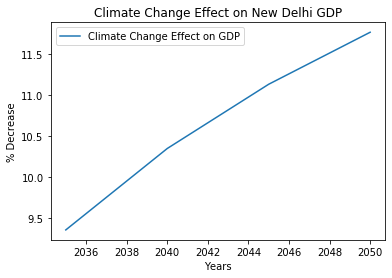

In [260]:
# Visualize the Climate Change effect on the currency

plt.title('Climate Change Effect on New Delhi GDP')

plt.plot(GDP_variation['Year'], GDP_variation['Climate_Effect'],  label ='Climate Change Effect on GDP')

plt.xlabel('Years')
plt.ylabel('% Decrease')

plt.legend(loc="upper left")
plt.show()

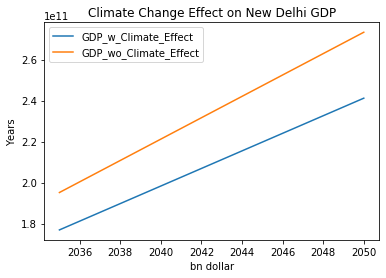

In [259]:
# Visualize the Climate Change effect on the currency

plt.title('Climate Change Effect on New Delhi GDP')

plt.plot(GDP_variation['Year'], GDP_variation['GDP_w_Climate_Effect'],  label ='GDP_w_Climate_Effect')
plt.plot(GDP_variation['Year'], GDP_variation['GDP_wo_Climate_Effect'], label ='GDP_wo_Climate_Effect')

plt.xlabel('bn dollar')
plt.ylabel('Years')

plt.legend(loc="upper left")
plt.show()